In [2]:
#Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading The Dataset
dataset = pd.read_csv("pulsar_stars.csv")
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
print(dataset.columns)

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


In [5]:
#Understanding The Dataset
print(dataset.describe())

        Mean of the integrated profile  \
count                     17898.000000   
mean                        111.079968   
std                          25.652935   
min                           5.812500   
25%                         100.929688   
50%                         115.078125   
75%                         127.085938   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                   17898.000000   
mean                                       46.549532   
std                                         6.843189   
min                                        24.772042   
25%                                        42.376018   
50%                                        46.947479   
75%                                        51.023202   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                17898.000000   
mean      

In [6]:
#Performing Dimensionality Reduction Using P-Test
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           target_class   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              5414.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        15:45:33   Log-Likelihood:                          7003.7
No. Observations:               17898   AIC:                                 -1.399e+04
Df Residuals:                   17890   BIC:                                 -1.393e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
 Mean of the integrated profile                   0.0018      0.000     17.083      0.000       0.002       0.002
 Standard deviation of the integrated profile    -0.0028      0.000    -12.301      0.000      -0.003      -0.002
 Excess kurtosis of the integrated profile        0.3579      0.005     65.902      0.000       0.347       0.369
 Skewness of the integrated profile              -0.0248      0.001    -32.465      0.000      -0.026      -0.023
 Mean of the DM-SNR curve                        -0.0012   7.81e-05    -14.798      0.000      -0.001      -0.001
 Standard deviation of the DM-SNR curve           0.0017      0.000     11.191      0.000       0.001       0.002
 Excess kurtosis of the DM-SNR curve             -0.0258      0.001    -19.895      0.000      -0.028      -0.023
 Skewness of the DM-SNR curve                     0.0008   4.28e-05     18.104      0.000       0.001       0.001
==============================================================================
Omnibus:                    10024.318   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116363.565
Skew:                           2.478   Prob(JB):                         0.00
Kurtosis:                      14.466   Cond. No.                         814.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#No Columns Can Be Removed Using P-Test

In [8]:
#Performing Dimensionality Reduction Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)
l = np.array(pca.explained_variance_ratio_)
print([ "{:0.2f}".format(x) for x in l ])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

['0.87', '0.08', '0.04', '0.01', '0.00', '0.00', '0.00', '0.00']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c218339d0>,
      dtype=object)

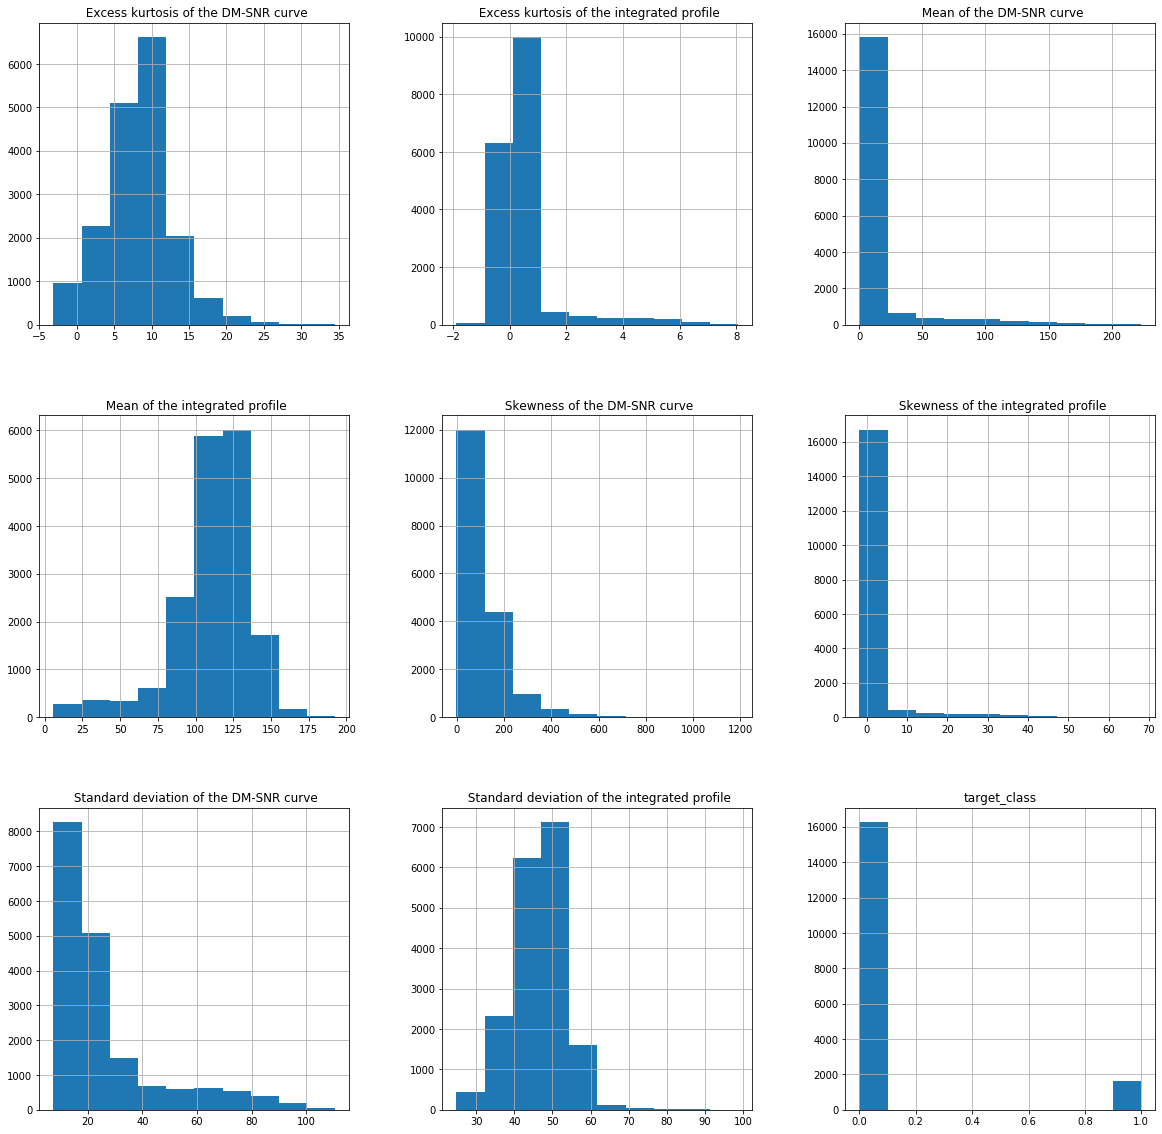

In [9]:
plt.rcParams['figure.figsize'] = [20,20]
dataset.hist()
plt.show()

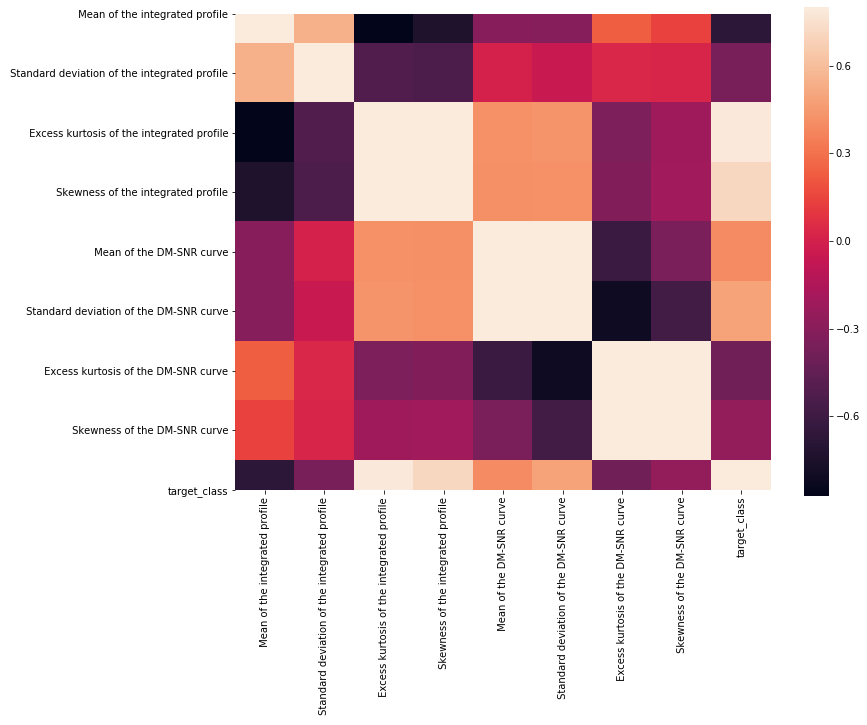

In [10]:
#Visualising The Correlation Matrix
fig=plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(),vmax=.8,square=True)
plt.show()

In [11]:
#Splitting The Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
#Scaling The Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Finding the Outlier Fraction
fraud = dataset[dataset['target_class']==1]
valid = dataset[dataset['target_class']==0]
outlier_fraction = len(fraud)/(float)(len(valid))

In [14]:
from sklearn.metrics import accuracy_score
name = []
acc = []

In [15]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=30, contamination=outlier_fraction)
y_pred = model.fit_predict(X)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
print(accuracy_score(y,y_pred))
acc.append(accuracy_score(y,y_pred))
name.append("LocalOutlierFactor")

0.8299251312995866


In [16]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(max_samples=len(X), contamination=outlier_fraction)
model.fit(X)
y_pred=model.predict(X)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
print(accuracy_score(y,y_pred))
acc.append(accuracy_score(y,y_pred))
name.append("IsolationForest")

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.10080570760809397, max_features=1.0,
                max_samples=17898, n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

0.9335121242596938


In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
acc.append(accuracy_score(y_test,y_pred))
name.append("KNN")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

0.9769832402234637


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
paramgrid = {'max_depth' : [4,6,8,12], 'criterion' : ['gini', 'entropy']}
grid = GridSearchCV(estimator=model, param_grid=paramgrid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
my_model = grid.best_estimator_
y_pred = my_model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
name.append("DecisionTreeClassifier")

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

0.9789907485188423
{'criterion': 'gini', 'max_depth': 4}


In [22]:
from sklearn.ensemble import RandomForestClassifier
paramgrid = {'n_estimators': [10,50,100],'max_depth' : [4,6,12], 'criterion' : ['gini', 'entropy']}
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=paramgrid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
my_model = grid.best_estimator_
y_pred = my_model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
name.append("RandomForestClassifier")

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

0.9792144619171218
{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100}


<BarContainer object of 5 artists>

Text(0.5, 0, 'Accuracy')

Text(0, 0.5, 'Models')

Text(0.5, 1.0, 'Model Accuracy')

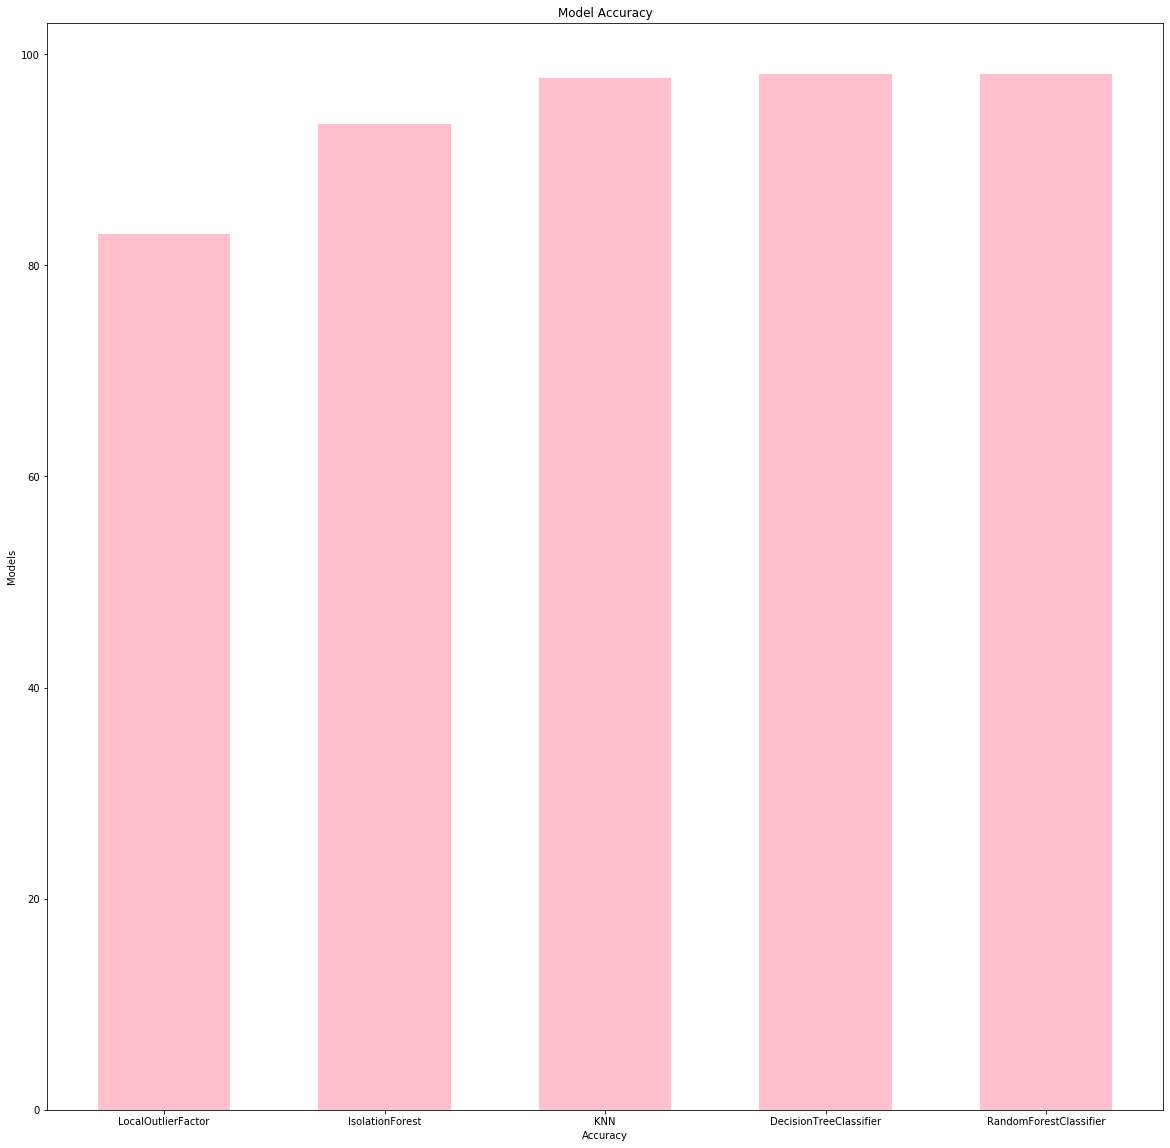

In [38]:
x = [i*100 for i in acc]
plt.bar(name,x,color="pink", width=0.6);
plt.xlabel("Accuracy");
plt.ylabel("Models");
plt.title("Model Accuracy");
plt.show()

In [34]:
print("Best Model: Decision Tree Classifier")
print("Best Accuracy: 97.92%")

Best Model: Decision Tree Classifier
Best Accuracy: 97.92%
